# Логистическая регрессия с помощью TensorFlow

## Содержание

1. Бинарная классификация с двумя параметрами на iris.csv  
2. Бинарная классификация с четырьмя параметрами на iris.csv

## 1. Бинарная классификация с двумя параметрами на iris.csv 

### Предобработка данных

In [278]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # для визуализации
import os # для обработки пути к данным как на Unix-системах, так и на Windows

In [280]:
np.random.seed(42) # фиксирование псевдорандомного генератора

In [279]:
DATA_DIR = "data" # путь к данным

In [281]:
df_iris = pd.read_csv(os.path.join(DATA_DIR, 'iris.csv')) # прочитать данные из CSV
df_iris = df_iris.iloc[:100] # взять только два вида ирисов для бинарной классификации
df_iris = df_iris.sample(frac=1, random_state=42) # перемешать данные
df_iris = df_iris.reset_index(drop=True) # сбросить индексы для красоты

# можно было записать одной строкой
# df_iris = pd.read_csv(os.path.join(DATA_DIR, 'iris.csv')).iloc[:100].sample(frac=1, random_state=42).reset_index(drop=True)

df_iris['species'] = df_iris['species'].astype('category').cat.codes # заменить setosa и versicolor на 0 и 1
df_iris.head() # вывести первые 5 рядов

,sepal_length,sepal_width,petal_length,petal_width,species
0,6.0,2.7,5.1,1.6,1
1,5.5,2.3,4.0,1.3,1
2,5.9,3.2,4.8,1.8,1
3,4.8,3.0,1.4,0.3,0
4,5.1,3.8,1.9,0.4,0


In [282]:
# тренировочный датасет
X_train = df_iris[['sepal_length', 'sepal_width']][:67].values # два параметра - sepal_length и sepal_width
y_train = df_iris['species'][:67].values

# тестовый датасет
X_test = df_iris[['sepal_length', 'sepal_width']][67:].values # два параметра - sepal_length и sepal_width
y_test = df_iris['species'][67:].values

print("X_train.shape: {}".format(X_train.shape))
print("y_train.shape: {}".format(y_train.shape))
print("X_test.shape: {}".format(X_test.shape))
print("y_test.shape: {}".format(y_test.shape))

X_train.shape: (67, 2)
y_train.shape: (67,)
X_test.shape: (33, 2)
y_test.shape: (33,)


### Визуализация данных

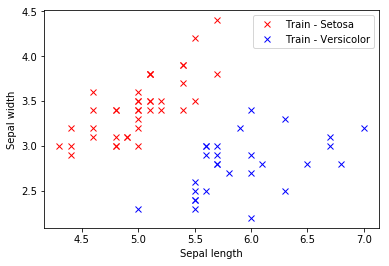

In [283]:
plt.plot(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], 'rx', label='Train - Setosa')

plt.plot(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], 'bx', label='Train - Versicolor')

plt.xlabel("Sepal length") # надпись по оси X
plt.ylabel("Sepal width") # надпись по оси Y
plt.legend() # отображение легенды
plt.show() # отображение графика

### Создание и тренировка модели

In [20]:
########################################## TODO ########################################################

### Оценка модели

In [20]:
########################################## TODO ########################################################

### Визуализация работы модели

In [287]:
h = 0.01
x_min, x_max = X_train[:, 0].min()-1, X_train[:, 0].max()+1
y_min, y_max = X_train[:, 1].min()-1, X_train[:, 1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

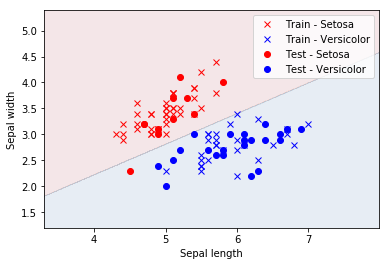

In [288]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.plot(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], 'rx', label='Train - Setosa')
plt.plot(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], 'bx', label='Train - Versicolor')
plt.plot(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], 'ro', label='Test - Setosa')
plt.plot(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], 'bo', label='Test - Versicolor')
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.1) # цветовые области

plt.xlabel("Sepal length") # надпись по оси X
plt.ylabel("Sepal width") # надпись по оси Y
plt.legend() # отображение легенды
plt.show() # отображение графика

## 2. Бинарная классификация с четырьмя параметрами на iris.csv 

### Предобработка данных

In [289]:
import numpy as np
import pandas as pd
import os # для обработки пути к данным как на Unix-системах, так и на Windows

In [280]:
np.random.seed(42) # фиксирование псевдорандомного генератора

In [290]:
DATA_DIR = "data" # путь к данным

In [292]:
df_iris = pd.read_csv(os.path.join(DATA_DIR, 'iris.csv')) # прочитать данные из CSV
df_iris = df_iris.iloc[:100] # взять только два вида ирисов для бинарной классификации
df_iris = df_iris.sample(frac=1, random_state=42) # перемешать данные
df_iris = df_iris.reset_index(drop=True) # сбросить индексы для красоты

# можно было записать одной строкой
# df_iris = pd.read_csv(os.path.join(DATA_DIR, 'iris.csv')).iloc[:100].sample(frac=1, random_state=42).reset_index(drop=True)

df_iris['species'] = df_iris['species'].astype('category').cat.codes # заменить setosa и versicolor на 0 и 1
df_iris.head() # вывести первые 5 рядов

,sepal_length,sepal_width,petal_length,petal_width,species
0,6.0,2.7,5.1,1.6,1
1,5.5,2.3,4.0,1.3,1
2,5.9,3.2,4.8,1.8,1
3,4.8,3.0,1.4,0.3,0
4,5.1,3.8,1.9,0.4,0


In [293]:
# тренировочный датасет
X_train = df_iris.drop(['species'], axis=1).iloc[:67].values # четыре параметра
y_train = df_iris['species'][:67].values

# тестовый датасет
X_test = df_iris.drop(['species'], axis=1).iloc[67:].values # четыре параметра
y_test = df_iris['species'][67:].values

print("X_train.shape: {}".format(X_train.shape))
print("y_train.shape: {}".format(y_train.shape))
print("X_test.shape: {}".format(X_test.shape))
print("y_test.shape: {}".format(y_test.shape))

X_train.shape: (67, 4)
y_train.shape: (67,)
X_test.shape: (33, 4)
y_test.shape: (33,)


### Создание и тренировка модели

In [20]:
########################################## TODO ########################################################

### Оценка модели

In [20]:
########################################## TODO ########################################################